1. Use HF Datasets to load the train split of the google/fleurs dataset

In [ ]:
! pip install datasets[audio] librosa transformers

In [27]:
from datasets import load_dataset
from datasets import Dataset
import numpy as np

In [28]:
# load the google fleurs train dataset as streaming
fleurs_en_streaming = load_dataset('google/fleurs', 'en_us', split='train', streaming=True)

In [33]:
# get the first 3 samples
samples = fleurs_en_streaming.take(3)
samples = [sample for sample in samples]
samples

[{'id': 903,
  'num_samples': 108800,
  'path': None,
  'audio': {'path': 'train/10004088536354799741.wav',
   'array': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          -3.15904617e-06, -3.03983688e-06, -3.27825546e-06]),
   'sampling_rate': 16000},
  'transcription': 'a tornado is a spinning column of very low-pressure air which sucks the surrounding air inward and upward',
  'raw_transcription': 'A tornado is a spinning column of very low-pressure air, which sucks the surrounding air inward and upward.',
  'gender': 1,
  'lang_id': 19,
  'language': 'English',
  'lang_group_id': 0},
 {'id': 279,
  'num_samples': 122880,
  'path': None,
  'audio': {'path': 'train/10012216926115652402.wav',
   'array': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          -7.60555267e-05,  8.94069672e-07,  7.99894333e-05]),
   'sampling_rate': 16000},
  'transcription': 'former u.s. speaker of the house newt gingrich came in second with 32%',
  'raw_transcript

In [35]:
# get the 3rd sample
example = samples[2]
example

{'id': 722,
 'num_samples': 164160,
 'path': None,
 'audio': {'path': 'train/10035729252730569448.wav',
  'array': array([0.        , 0.        , 0.        , ..., 0.00266123, 0.00290918,
         0.00321454]),
  'sampling_rate': 16000},
 'transcription': 'the island was first inhabited by the taínos and caribes. the caribes were an arawakan-speaking people who had arrived around 10,000 bce',
 'raw_transcription': 'The island was first inhabited by the Taínos and Caribes. The Caribes were an Arawakan-speaking people who had arrived around 10,000 BCE.',
 'gender': 1,
 'lang_id': 19,
 'language': 'English',
 'lang_group_id': 0}

In [36]:
example.keys()

dict_keys(['id', 'num_samples', 'path', 'audio', 'transcription', 'raw_transcription', 'gender', 'lang_id', 'language', 'lang_group_id'])

In [38]:
# listen to the example audio
from IPython.display import Audio
Audio(example['audio']['array'], rate=example['audio']['sampling_rate'])

In [23]:
example['audio']['array']

array([0.        , 0.        , 0.        , ..., 0.00266123, 0.00290918,
       0.00321454])

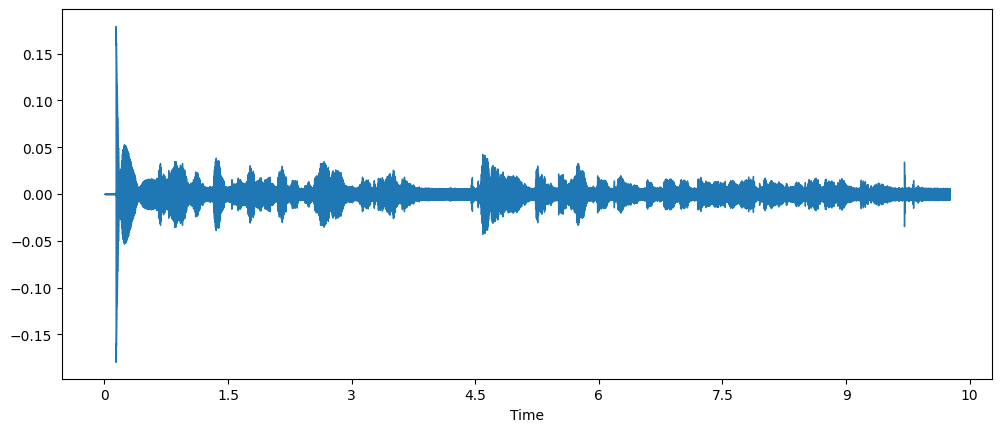

In [39]:
# Plot the example's waveform
import matplotlib.pyplot as plt
import librosa
import librosa.display

# load the audio
array = example['audio']['array']
sampling_rate = example['audio']['sampling_rate']

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)


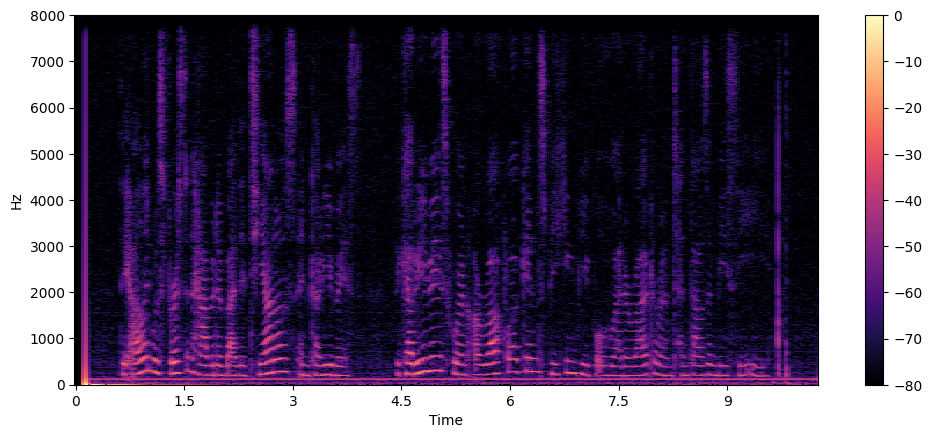

In [40]:
# Plot the example's spectrogram

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()